In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
csv_adbe = "C:/Business analysis/Project/IS403.O22.HTCLL_Nhom07/Dataset/ADBE_Stock.csv"
df_adbe = pd.read_csv(csv_adbe, thousands=',')

In [3]:
df_adbe.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,3/1/2019,ADBE,264.010010,264.010010,266.239990,261.500000,265.750000,2594000
1,3/4/2019,ADBE,258.160004,258.160004,267.000000,254.080002,266.700012,2994900
2,3/5/2019,ADBE,257.380005,257.380005,259.869995,256.369995,259.000000,2101800
3,3/6/2019,ADBE,256.399994,256.399994,259.489990,253.839996,257.399994,1950500
4,3/7/2019,ADBE,255.460007,255.460007,257.489990,253.289993,255.770004,3185200


In [4]:
df_adbe.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1.324000e+03
mean,437.561171,437.561171,442.956797,431.746496,437.548852,2.987458e+06
std,112.802864,112.802864,113.786692,111.798628,112.881015,1.733830e+06
min,254.740005,254.740005,255.020004,249.100006,251.490005,5.892000e+05
25%,339.532501,339.532501,344.690010,333.492500,338.960007,2.039850e+06
50%,443.785004,443.785004,449.224991,436.915009,444.769989,2.573100e+06
75%,514.142502,514.142502,520.422485,508.869987,514.000000,3.413750e+06
max,688.369995,688.369995,699.539978,678.909973,696.280029,2.784020e+07


In [5]:
df_adbe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1324 non-null   object 
 1   Symbol     1324 non-null   object 
 2   Adj Close  1324 non-null   float64
 3   Close      1324 non-null   float64
 4   High       1324 non-null   float64
 5   Low        1324 non-null   float64
 6   Open       1324 non-null   float64
 7   Volume     1324 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 82.9+ KB


In [6]:
# Convert object to datetime64
df_adbe['Date'] = df_adbe['Date'].apply(pd.to_datetime)
# Sort data by date time value
df_adbe = df_adbe.sort_values(by="Date").reset_index(drop=True)
df_adbe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1324 non-null   datetime64[ns]
 1   Symbol     1324 non-null   object        
 2   Adj Close  1324 non-null   float64       
 3   Close      1324 non-null   float64       
 4   High       1324 non-null   float64       
 5   Low        1324 non-null   float64       
 6   Open       1324 non-null   float64       
 7   Volume     1324 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 82.9+ KB


In [7]:
df_adbe.Close

0       264.010010
1       258.160004
2       257.380005
3       256.399994
4       255.460007
           ...    
1319    478.429993
1320    477.600006
1321    445.869995
1322    444.760010
1323    439.019989
Name: Close, Length: 1324, dtype: float64

In [8]:
df_adbe['Prev_close'] = df_adbe.shift(1)['Close']
df_adbe.Prev_close

0              NaN
1       264.010010
2       258.160004
3       257.380005
4       256.399994
           ...    
1319    475.429993
1320    478.429993
1321    477.600006
1322    445.869995
1323    444.760010
Name: Prev_close, Length: 1324, dtype: float64

In [9]:
df_adbe.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close
0,2019-03-01,ADBE,264.010010,264.010010,266.239990,261.500000,265.750000,2594000,NaN
1,2019-03-04,ADBE,258.160004,258.160004,267.000000,254.080002,266.700012,2994900,264.010010
2,2019-03-05,ADBE,257.380005,257.380005,259.869995,256.369995,259.000000,2101800,258.160004
3,2019-03-06,ADBE,256.399994,256.399994,259.489990,253.839996,257.399994,1950500,257.380005
4,2019-03-07,ADBE,255.460007,255.460007,257.489990,253.289993,255.770004,3185200,256.399994


In [10]:
df_adbe['Close_change'] = df_adbe.progress_apply(
    lambda row: 0 if np.isnan(row.Prev_close) else row.Close - row.Prev_close,
    axis = 1
)

  0%|          | 0/1324 [00:00<?, ?it/s]

In [11]:
df_adbe.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close,Close_change
0,2019-03-01,ADBE,264.010010,264.010010,266.239990,261.500000,265.750000,2594000,NaN,0.000000
1,2019-03-04,ADBE,258.160004,258.160004,267.000000,254.080002,266.700012,2994900,264.010010,-5.850006
2,2019-03-05,ADBE,257.380005,257.380005,259.869995,256.369995,259.000000,2101800,258.160004,-0.779999
3,2019-03-06,ADBE,256.399994,256.399994,259.489990,253.839996,257.399994,1950500,257.380005,-0.980011
4,2019-03-07,ADBE,255.460007,255.460007,257.489990,253.289993,255.770004,3185200,256.399994,-0.939987


In [12]:
rows = []
for _,row in tqdm(df_adbe.iterrows(), total=df_adbe.shape[0]):
    row_data = dict(
        day = row.Date.day,
        month = row.Date.month,
        year = row.Date.year,
        open = row.Open,
        low = row.Close,
        high = row.High, 
        close = row.Close, 
        volume = row.Volume,
        close_change = row.Close_change
    )
    rows.append(row_data)
features_adbe = pd.DataFrame(rows)

  0%|          | 0/1324 [00:00<?, ?it/s]

In [13]:
features_adbe.head()

,day,month,year,open,low,high,close,volume,close_change
0,1,3,2019,265.750000,264.010010,266.239990,264.010010,2594000,0.000000
1,4,3,2019,266.700012,258.160004,267.000000,258.160004,2994900,-5.850006
2,5,3,2019,259.000000,257.380005,259.869995,257.380005,2101800,-0.779999
3,6,3,2019,257.399994,256.399994,259.489990,256.399994,1950500,-0.980011
4,7,3,2019,255.770004,255.460007,257.489990,255.460007,3185200,-0.939987


In [14]:
def detect_outlier(df, col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

In [15]:
detect_outlier(features_adbe, 'close')

Empty DataFrame
Columns: [day, month, year, open, low, high, close, volume, close_change]
Index: []


In [16]:
detect_outlier(features_adbe, 'volume')

      day  month  year        open         low        high       close   
10     15      3  2019  258.029999  257.089996  260.000000  257.089996  \
40     29      4  2019  286.459992  286.140015  291.709992  286.140015   
76     19      6  2019  287.000000  291.209992  292.000000  291.209992   
77     20      6  2019  293.250000  302.109985  302.660004  302.109985   
139    18      9  2019  275.350006  279.720001  280.290008  279.720001   
...   ...    ...   ...         ...         ...         ...         ...   
1270   18      3  2024  495.549988  513.859985  515.729981  513.859985   
1271   19      3  2024  509.890015  521.190002  522.679993  521.190002   
1288   12      4  2024  477.950012  474.089996  478.779999  474.089996   
1321   30      5  2024  464.899994  445.869995  466.820007  445.869995   
1322   31      5  2024  447.720001  444.760010  448.230011  444.760010   

        volume  close_change  
10    12110500    -10.600006  
40     5592400      4.180023  
76     9738600    

In [17]:
detect_outlier(features_adbe, 'close_change')

      day  month  year        open         low        high       close   
257     9      3  2020  311.679993  305.790008  322.440002  305.790008  \
258    10      3  2020  318.980011  332.380005  332.940002  332.380005   
260    12      3  2020  290.410004  285.000000  310.130005  285.000000   
261    13      3  2020  312.880005  335.500000  336.000000  335.500000   
262    16      3  2020  288.359985  286.029999  307.109985  286.029999   
...   ...    ...   ...         ...         ...         ...         ...   
1250   16      2  2024  589.900024  546.659973  590.140015  546.659973   
1261    5      3  2024  562.599976  544.840027  564.190002  544.840027   
1269   15      3  2024  499.640015  492.459992  503.130005  492.459992   
1270   18      3  2024  495.549988  513.859985  515.729981  513.859985   
1321   30      5  2024  464.899994  445.869995  466.820007  445.869995   

        volume  close_change  
257    5291900    -30.979981  
258    5973700     26.589996  
260    7230200    

In [18]:
train_size = int(0.7 * len(features_adbe))
test_size = len(features_adbe)-train_size

train_adbe_df = features_adbe[:train_size]
test_adbe_df = features_adbe[train_size:]

In [19]:
#Quá trình Training
x_train = np.array(train_adbe_df.index).reshape(-1, 1)
y_train = np.array(train_adbe_df['close'])
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
# In các thông số của mô hình
print("Hệ số hồi quy (slope):", model.coef_)
print("Sai số chệch (intercept):", model.intercept_)

Hệ số hồi quy (slope): [0.23795499]
Sai số chệch (intercept): 313.9287136995304


In [20]:
#Quá trình testing
x_test = np.array(test_adbe_df.index).reshape(-1, 1)
y_test = np.array(test_adbe_df['close'])
y_pred = model.predict(x_test)

In [21]:
#Quá trình tạo index predict 30 ngày tiếp theo
last_index = features_adbe.index[-1]
last_30_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[628.98111509 629.21907008 629.45702507 629.69498005 629.93293504
 630.17089002 630.40884501 630.6468     630.88475498 631.12270997
 631.36066495 631.59861994 631.83657493 632.07452991 632.3124849
 632.55043988 632.78839487 633.02634986 633.26430484 633.50225983
 633.74021481 633.9781698  634.21612479 634.45407977 634.69203476
 634.92998974 635.16794473 635.40589972 635.6438547  635.88180969]


In [22]:
#Quá trình tạo index predict 60 ngày tiếp theo
last_index = features_adbe.index[-1]
last_60_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[628.98111509 629.21907008 629.45702507 629.69498005 629.93293504
 630.17089002 630.40884501 630.6468     630.88475498 631.12270997
 631.36066495 631.59861994 631.83657493 632.07452991 632.3124849
 632.55043988 632.78839487 633.02634986 633.26430484 633.50225983
 633.74021481 633.9781698  634.21612479 634.45407977 634.69203476
 634.92998974 635.16794473 635.40589972 635.6438547  635.88180969
 636.11976467 636.35771966 636.59567465 636.83362963 637.07158462
 637.3095396  637.54749459 637.78544957 638.02340456 638.26135955
 638.49931453 638.73726952 638.9752245  639.21317949 639.45113448
 639.68908946 639.92704445 640.16499943 640.40295442 640.64090941
 640.87886439 641.11681938 641.35477436 641.59272935 641.83068434
 642.06863932 642.30659431 642.54454929 642.78250428 643.02045927]


In [23]:
#Quá trình tạo index predict 90 ngày tiếp theo
last_index = features_adbe.index[-1]
last_90_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[628.98111509 629.21907008 629.45702507 629.69498005 629.93293504
 630.17089002 630.40884501 630.6468     630.88475498 631.12270997
 631.36066495 631.59861994 631.83657493 632.07452991 632.3124849
 632.55043988 632.78839487 633.02634986 633.26430484 633.50225983
 633.74021481 633.9781698  634.21612479 634.45407977 634.69203476
 634.92998974 635.16794473 635.40589972 635.6438547  635.88180969
 636.11976467 636.35771966 636.59567465 636.83362963 637.07158462
 637.3095396  637.54749459 637.78544957 638.02340456 638.26135955
 638.49931453 638.73726952 638.9752245  639.21317949 639.45113448
 639.68908946 639.92704445 640.16499943 640.40295442 640.64090941
 640.87886439 641.11681938 641.35477436 641.59272935 641.83068434
 642.06863932 642.30659431 642.54454929 642.78250428 643.02045927
 643.25841425 643.49636924 643.73432422 643.97227921 644.2102342
 644.44818918 644.68614417 644.92409915 645.16205414 645.40000913
 645.63796411 645.8759191  646.

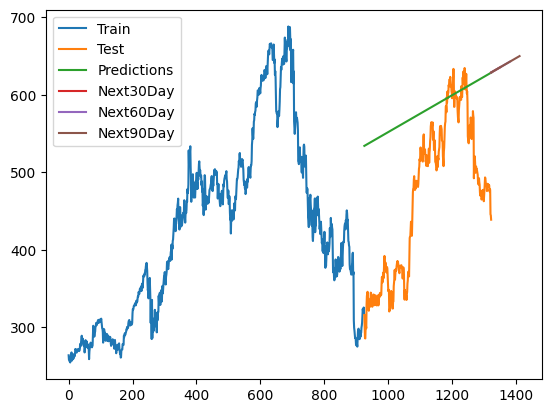

In [24]:
#Vẽ hình
plt.plot(train_adbe_df.index, train_adbe_df['close'])
plt.plot(test_adbe_df.index, test_adbe_df['close'])
plt.plot(test_adbe_df.index, y_pred)
plt.plot(last_30_data,y_next_30_days)
plt.plot(last_60_data,y_next_60_days)
plt.plot(last_90_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()